# Hurst Exponent using R/S

In [120]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import linregress
import matplotlib.pyplot as plt
import PyPDF2

### daily

In [2]:
data=pd.read_csv('xbtusd_daily.csv')
data.head()

,Dates,PX_LAST,PX_BID,PX_ASK
0,7/19/2010,0.08,NaN,NaN
1,7/20/2010,0.07,NaN,NaN
2,7/21/2010,0.08,NaN,NaN
3,7/22/2010,0.05,NaN,NaN
4,7/23/2010,0.06,NaN,NaN


In [3]:
date=data['Dates']
data=data['PX_LAST']

In [4]:
data=data.pct_change()

In [5]:
data=data[pd.notnull(data)]

In [6]:
date=date[1:]

In [7]:
N=1024
n_ls=[512,256,128,64,32,16]
hurst_exponent=[]

for start in range(N,len(data)+1):
    
    y=data[start-N:start]
    avg_rs=[]

    for n in n_ls:
        RS=[]
        subsamples = np.array_split(y, N // n)
        for i, subsample in enumerate(subsamples):
            m=np.mean(subsample)
            yt=subsample-m
            zt=np.cumsum(yt)
            R=max(zt)-min(zt)
            S=np.sqrt(sum(yt**2)/(n-1))
            RS.append(R/S)

        avg_rs.append(np.mean([x for x in RS if not np.isnan(x)]))

    slope, intercept, r_value, p_value, std_err = linregress(np.log(n_ls),np.log(avg_rs))
    hurst_exponent.append(slope)

/var/folders/pm/w4n07xw134ngfqypr7l51kw00000gn/T/ipykernel_41360/2177846810.py:19: RuntimeWarning: invalid value encountered in double_scalars
  RS.append(R/S)


In [8]:
smoothed_h=pd.Series(hurst_exponent).ewm(span=10,adjust=False).mean()

In [9]:
std_dev = np.std(hurst_exponent)

In [10]:
upper_bound = np.mean(hurst_exponent) + 2 * std_dev
lower_bound = np.mean(hurst_exponent) - 2 * std_dev

In [11]:
len(date[1203:])

2804

In [107]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=date[1023:], 
        y=hurst_exponent,
        mode="lines",
        line=go.scatter.Line(color='rgb(78,144,10)'),
        name='Hurst Exponent')
)
fig.add_trace(
    go.Scatter(
        x=date[1023:], 
        y=[upper_bound]*3000,
        mode="lines",
        line=dict(dash='dash',color='grey'),
        name='Upper Bound')
)
 
fig.add_trace(
    go.Scatter(
        x=date[1023:], 
        y=[lower_bound]*3000,
        mode="lines",
        line=dict(dash='dash',color='grey'),
        name='Lower Bound')
)
   
fig.add_trace(
    go.Scatter(
        x=date[1023:], 
        y=smoothed_h,
        mode="lines",
        line=go.scatter.Line(color='red'),
        name='Smoothed Hurst Exponent')
)
fig.update_layout(yaxis_tickformat=',',
                  xaxis_tickformat='%d %b <br>%Y',
                  
                  title={'text': "Hurst Exponent of Bitcoin - daily with std", 'y': 0.95, 'x': 0.5,
                         'xanchor': "center",
                         'yanchor': 'top'},
                  title_font_color='rgb(78,144,10)',
                  font_color='rgb(25,26,25)',
                  #font_family='Avondale',
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  legend=dict(
                       orientation="h",
                       yanchor="bottom",
                       y=1.02,
                       xanchor="right",
                       x=1)
                  )
watermark_opacity = 0.3  


fig.add_annotation(
    text='Samara Alpha Management    Samara Alpha Management   Samara Alpha Management',
    xref="paper",
    yref="paper",
    x=-1.3,
    y=0.5,
    showarrow=False,
    font=dict(size=35,color="rgba(160, 160, 160, " + str(watermark_opacity) + ")"),  
    textangle=-45  
)
fig.add_annotation(
    text='Samara Alpha Management    Samara Alpha Management   Samara Alpha Management',
    xref="paper",
    yref="paper",
    x=-1,
    y=0.5,
    showarrow=False,
    font=dict(size=35,color="rgba(160, 160, 160, " + str(watermark_opacity) + ")"),  
    textangle=-45  
)

fig.add_annotation(
    text='Samara Alpha Management    Samara Alpha Management   Samara Alpha Management',
    xref="paper",
    yref="paper",
    x=-0.7,
    y=0.5,
    showarrow=False,
    font=dict(size=35,color="rgba(160, 160, 160, " + str(watermark_opacity) + ")"), 
    textangle=-45  
)


fig.add_annotation(
    text='Samara Alpha Management    Samara Alpha Management   Samara Alpha Management',
    xref="paper",
    yref="paper",
    x=-0.1,
    y=0.5,
    showarrow=False,
    font=dict(size=35,color="rgba(160, 160, 160, " + str(watermark_opacity) + ")"), 
    textangle=-45  
)

fig.add_annotation(
    text='Samara Alpha Management    Samara Alpha Management   Samara Alpha Management',
    xref="paper",
    yref="paper",
    x=-0.4,
    y=0.5,
    showarrow=False,
    font=dict(size=35,color="rgba(160, 160, 160, " + str(watermark_opacity) + ")"),  
    textangle=-45  
)

fig.add_annotation(
    text='Samara Alpha Management    Samara Alpha Management   Samara Alpha Management',
    xref="paper",
    yref="paper",
    x=0.3,
    y=0.5,
    showarrow=False,
    font=dict(size=35,color="rgba(160, 160, 160, " + str(watermark_opacity) + ")"),  
    textangle=-45  
)

fig.update_xaxes(title_text="time",showgrid=False,linecolor='rgb(93,94,95)',tickformat="%Y")
fig.update_yaxes(title_text="Hurst exponent",showgrid=True,gridcolor='rgb(187,188,189)')
# fig.show()
image_name=f"./hurst_exponent_BTC_daily_std.pdf"
fig.write_image(image_name)

### daily different rolling windows

In [121]:
data=pd.read_csv('xbtusd_daily.csv')
date=data['Dates']
data=data['PX_LAST']
data=data.pct_change()
data=data[pd.notnull(data)]
date=date[1:]

In [122]:
hurst_results = pd.DataFrame()
for N in [30,60,90]:
    n_ls=[512,256,128,64,32,16]
    hurst_exponent=[]

    for start in range(N,len(data)+1):

        y=data[start-N:start]
        avg_rs=[]

        for n in n_ls:
            RS=[]
            subsamples = np.array_split(y, N // n)
            for i, subsample in enumerate(subsamples):
                m=np.mean(subsample)
                yt=subsample-m
                zt=np.cumsum(yt)
                R=max(zt)-min(zt)
                S=np.sqrt(sum(yt**2)/(n-1))
                RS.append(R/S)

            avg_rs.append(np.mean([x for x in RS if not np.isnan(x)]))

        slope, intercept, r_value, p_value, std_err = linregress(np.log(n_ls),np.log(avg_rs))
        hurst_exponent.append(slope)
        
    hurst_results[f'{N}-Day'] = hurst_exponent

ValueError: number sections must be larger than 0.

In [ ]:
smoothed_h=pd.Series(hurst_exponent).ewm(span=10,adjust=False).mean()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=date[1023:], 
        y=hurst_exponent,
        mode="lines",
        line=go.scatter.Line(color='rgb(78,144,10)'),
        name='Hurst Exponent')
)
fig.add_trace(
    go.Scatter(
        x=date[1023:], 
        y=[upper_bound]*3000,
        mode="lines",
        line=dict(dash='dash',color='grey'),
        name='Upper Bound')
)
 
fig.add_trace(
    go.Scatter(
        x=date[1023:], 
        y=[lower_bound]*3000,
        mode="lines",
        line=dict(dash='dash',color='grey'),
        name='Lower Bound')
)
   
fig.add_trace(
    go.Scatter(
        x=date[1023:], 
        y=smoothed_h,
        mode="lines",
        line=go.scatter.Line(color='red'),
        name='Smoothed Hurst Exponent')
)
fig.update_layout(yaxis_tickformat=',',
                  xaxis_tickformat='%d %b <br>%Y',
                  
                  title={'text': "Hurst Exponent of Bitcoin - daily with std", 'y': 0.95, 'x': 0.5,
                         'xanchor': "center",
                         'yanchor': 'top'},
                  title_font_color='rgb(78,144,10)',
                  font_color='rgb(25,26,25)',
                  #font_family='Avondale',
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  legend=dict(
                       orientation="h",
                       yanchor="bottom",
                       y=1.02,
                       xanchor="right",
                       x=1)
                  )
watermark_opacity = 0.3  


fig.add_annotation(
    text='Samara Alpha Management    Samara Alpha Management   Samara Alpha Management',
    xref="paper",
    yref="paper",
    x=-1.3,
    y=0.5,
    showarrow=False,
    font=dict(size=35,color="rgba(160, 160, 160, " + str(watermark_opacity) + ")"),  
    textangle=-45  
)
fig.add_annotation(
    text='Samara Alpha Management    Samara Alpha Management   Samara Alpha Management',
    xref="paper",
    yref="paper",
    x=-1,
    y=0.5,
    showarrow=False,
    font=dict(size=35,color="rgba(160, 160, 160, " + str(watermark_opacity) + ")"),  
    textangle=-45  
)

fig.add_annotation(
    text='Samara Alpha Management    Samara Alpha Management   Samara Alpha Management',
    xref="paper",
    yref="paper",
    x=-0.7,
    y=0.5,
    showarrow=False,
    font=dict(size=35,color="rgba(160, 160, 160, " + str(watermark_opacity) + ")"), 
    textangle=-45  
)


fig.add_annotation(
    text='Samara Alpha Management    Samara Alpha Management   Samara Alpha Management',
    xref="paper",
    yref="paper",
    x=-0.1,
    y=0.5,
    showarrow=False,
    font=dict(size=35,color="rgba(160, 160, 160, " + str(watermark_opacity) + ")"), 
    textangle=-45  
)

fig.add_annotation(
    text='Samara Alpha Management    Samara Alpha Management   Samara Alpha Management',
    xref="paper",
    yref="paper",
    x=-0.4,
    y=0.5,
    showarrow=False,
    font=dict(size=35,color="rgba(160, 160, 160, " + str(watermark_opacity) + ")"),  
    textangle=-45  
)

fig.add_annotation(
    text='Samara Alpha Management    Samara Alpha Management   Samara Alpha Management',
    xref="paper",
    yref="paper",
    x=0.3,
    y=0.5,
    showarrow=False,
    font=dict(size=35,color="rgba(160, 160, 160, " + str(watermark_opacity) + ")"),  
    textangle=-45  
)

fig.update_xaxes(title_text="time",showgrid=False,linecolor='rgb(93,94,95)',tickformat="%Y")
fig.update_yaxes(title_text="Hurst exponent",showgrid=True,gridcolor='rgb(187,188,189)')
# fig.show()
image_name=f"./hurst_exponent_BTC_daily_std.pdf"
fig.write_image(image_name)

### 10s

In [108]:
data=pd.read_csv('xbtusd_10s_1.csv')
data=data[260000:]

In [109]:
data.head()

,Dates,Bid,Ask
260000,6/6/2023 11:17,25940.5,25974.75
260001,6/6/2023 11:18,25944.0,25985.95
260002,6/6/2023 11:18,25943.0,25971.75
260003,6/6/2023 11:18,25943.0,25971.00
260004,6/6/2023 11:18,25943.0,25965.00


In [110]:
data['Mid']=(data['Bid']+data['Ask'])/2
data=data[pd.notnull(data['Mid'])]
date=data['Dates']
data=data['Mid']

In [111]:
data=data.pct_change()
data=data[pd.notnull(data)]

In [112]:
date=date[1:]

In [113]:
N=1024
n_ls=[512,256,128,64,32,16]
hurst_exponent_s=[]

for start in range(N,len(data)+1):
    
    y=data[start-N:start]
    avg_rs=[]

    for n in n_ls:
        RS=[]
        subsamples = np.array_split(y, N // n)
        for i, subsample in enumerate(subsamples):
            m=np.mean(subsample)
            yt=subsample-m
            zt=np.cumsum(yt)
            R=max(zt)-min(zt)
            S=np.sqrt(sum(yt**2)/(n-1))
            RS.append(R/S)

        avg_rs.append(np.mean([x for x in RS if not np.isnan(x)]))

    slope, intercept, r_value, p_value, std_err = linregress(np.log(n_ls),np.log(avg_rs))
    hurst_exponent_s.append(slope)

In [114]:
smoothed_h_s=pd.Series(hurst_exponent_s).ewm(span=20,adjust=False).mean()

In [115]:
std_dev = np.std(hurst_exponent)
upper_bound = np.mean(hurst_exponent) + 2 * std_dev
lower_bound = np.mean(hurst_exponent) - 2 * std_dev

In [116]:
len(date[1203:])

6705

In [119]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=date[1023:], 
        y=hurst_exponent_s,
        mode="lines",
        line=go.scatter.Line(color='rgb(78,144,10)'),
        
        name='Hurst Exponent')
)

fig.add_trace(
    go.Scatter(
        x=date[1023:], 
        y=[upper_bound]*7000,
        mode="lines",
        line=dict(dash='dash',color='grey'),
        name='Upper Bound')
)
 
fig.add_trace(
    go.Scatter(
        x=date[1023:], 
        y=[lower_bound]*7000,
        mode="lines",
        line=dict(dash='dash',color='grey'),
        name='Lower Bound')
)

fig.add_trace(
    go.Scatter(
        x=date[1023:], 
        y=smoothed_h_s,
        mode="lines",
        line=go.scatter.Line(color='red'),
        
        name='Smoothed Hurst Exponent')
)

fig.update_layout(yaxis_tickformat=',',
                  xaxis_tickformat='%d %b <br>%Y',
                  title={'text': "Hurst Exponent of BTC - 10-second mid-price movements", 'y': 0.95, 'x': 0.5,
                         'xanchor': "center",
                         'yanchor': 'top'},
                  title_font_color='rgb(78,144,10)',
                  font_color='rgb(25,26,25)',
                  
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  legend=dict(
                       orientation="h",
                       yanchor="bottom",
                       y=1.02,
                       xanchor="right",
                       x=1)
                  )


watermark_opacity = 0.3  


fig.add_annotation(
    text='Samara Alpha Management    Samara Alpha Management   Samara Alpha Management',
    xref="paper",
    yref="paper",
    x=-1.3,
    y=0.5,
    showarrow=False,
    font=dict(size=35,color="rgba(160, 160, 160, " + str(watermark_opacity) + ")"),  
    textangle=-45  
)
fig.add_annotation(
    text='Samara Alpha Management    Samara Alpha Management   Samara Alpha Management',
    xref="paper",
    yref="paper",
    x=-1,
    y=0.5,
    showarrow=False,
    font=dict(size=35,color="rgba(160, 160, 160, " + str(watermark_opacity) + ")"),  
    textangle=-45  
)

fig.add_annotation(
    text='Samara Alpha Management    Samara Alpha Management   Samara Alpha Management',
    xref="paper",
    yref="paper",
    x=-0.7,
    y=0.5,
    showarrow=False,
    font=dict(size=35,color="rgba(160, 160, 160, " + str(watermark_opacity) + ")"), 
    textangle=-45  
)


fig.add_annotation(
    text='Samara Alpha Management    Samara Alpha Management   Samara Alpha Management',
    xref="paper",
    yref="paper",
    x=-0.1,
    y=0.5,
    showarrow=False,
    font=dict(size=35,color="rgba(160, 160, 160, " + str(watermark_opacity) + ")"), 
    textangle=-45  
)

fig.add_annotation(
    text='Samara Alpha Management    Samara Alpha Management   Samara Alpha Management',
    xref="paper",
    yref="paper",
    x=-0.4,
    y=0.5,
    showarrow=False,
    font=dict(size=35,color="rgba(160, 160, 160, " + str(watermark_opacity) + ")"),  
    textangle=-45  
)

fig.add_annotation(
    text='Samara Alpha Management    Samara Alpha Management   Samara Alpha Management',
    xref="paper",
    yref="paper",
    x=0.3,
    y=0.5,
    showarrow=False,
    font=dict(size=35,color="rgba(160, 160, 160, " + str(watermark_opacity) + ")"),  
    textangle=-45  
)

fig.update_xaxes(title_text="time",showgrid=False,linecolor='rgb(93,94,95)',tickformat="%Y")
fig.update_yaxes(title_text="Hurst exponent",showgrid=True,gridcolor='rgb(187,188,189)')
# fig.show()
image_name=f"./hurst_exponent_BTC_10s_std.pdf"
fig.write_image(image_name)

# Hurst Exponent using DFA

In [1]:
import pandas as pd
import numpy as np
from cryptocmd import CmcScraper
from scipy.optimize import curve_fit
from scipy.stats import linregress
import matplotlib.pyplot as plt
from MFDFA import MFDFA

import pandas_datareader.data as pdr
import datetime as dt
import pandas as pd
import yfinance as yfin
import os
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.interpolate import griddata
import plotly.offline as pyo
import numpy as np

coin_ls=['BTC','EURS','BNB','ETH','EUROC']
coin_data=pd.DataFrame()
for symbol in coin_ls:
    tmp=CmcScraper(symbol, '01-01-2011', '21-08-2023').get_dataframe()
    tmp=tmp[['Date','Close']]
    tmp.rename(columns={'Close':symbol},inplace=True)
    tmp.set_index('Date',inplace=True)
    if coin_data.shape[0]==0:
        coin_data=tmp
    else:
        coin_data=pd.concat([coin_data,tmp],axis=1)

In [2]:
yfin.pdr_override()

In [3]:
start_date = dt.date(2011, 1, 1)
end_date = dt.date.today()

start_date_str = start_date.isoformat()
end_date_str = end_date.isoformat()

In [4]:
def convert_datetime_to_date(series):
    hist_frame_df = series.to_frame()
    hist_frame_df = hist_frame_df.reset_index()
    hist_frame_df['Date'] = pd.to_datetime(hist_frame_df['Date']).dt.date
    hist_frame_df = hist_frame_df.set_index('Date')
    return hist_frame_df['Adj Close']

In [5]:
hist_frame=pdr.get_data_yahoo('EURUSD=X', start=start_date_str, end=end_date_str)['Adj Close'].dropna(axis=0)
hist_frame_df = hist_frame.to_frame()
hist_frame_df = hist_frame_df.reset_index()
hist_frame_df['Date']=hist_frame_df['Date'].apply(lambda x: x.strftime("%Y-%m-%d"))

[*********************100%***********************]  1 of 1 completed


In [6]:
symbol_ls=['BTC-USD','ETH-USD','BNB-USD','EURUSD=X']
data=pd.DataFrame()
data['Date']=hist_frame_df['Date']
for symbol in symbol_ls:
    hist_frame=pdr.get_data_yahoo(symbol, start=start_date_str, end=end_date_str)['Adj Close'].dropna(axis=0)
    hist_frame_df = hist_frame.to_frame()
    hist_frame_df = hist_frame_df.reset_index()
    hist_frame_df.rename(columns={'Adj Close':symbol},inplace=True)
    hist_frame_df['Date']=hist_frame_df['Date'].apply(lambda x: x.strftime("%Y-%m-%d"))
    print(hist_frame_df.shape[0])
    data=pd.merge(data, hist_frame_df, on='Date',how='left')
# hist_frame_df['Date'] = pd.to_datetime(hist_frame_df['Date']).dt.date
# hist_frame_df = hist_frame_df.set_index('Date')
# price_series = convert_datetime_to_date(hist_frame)

[*********************100%***********************]  1 of 1 completed
3258
[*********************100%***********************]  1 of 1 completed
2109
[*********************100%***********************]  1 of 1 completed
2109
[*********************100%***********************]  1 of 1 completed
3290


In [7]:
data.head()

,Date,BTC-USD,ETH-USD,BNB-USD,EURUSD=X
0,2011-01-03,NaN,NaN,NaN,1.335791
1,2011-01-04,NaN,NaN,NaN,1.335684
2,2011-01-05,NaN,NaN,NaN,1.332108
3,2011-01-06,NaN,NaN,NaN,1.315686
4,2011-01-07,NaN,NaN,NaN,1.297993


In [8]:
coin_data.reset_index(inplace=True)

In [10]:
data['BTC-USD']=coin_data['BTC']

In [11]:
data.head()

,Date,BTC-USD,ETH-USD,BNB-USD,EURUSD=X
0,2011-01-03,0.300000,NaN,NaN,1.335791
1,2011-01-04,0.300000,NaN,NaN,1.335684
2,2011-01-05,0.297348,NaN,NaN,1.332108
3,2011-01-06,0.299439,NaN,NaN,1.315686
4,2011-01-07,0.299252,NaN,NaN,1.297993


In [12]:
coin_data.head()

,Date,BTC,EURS,BNB,ETH,EUROC
0,2011-01-01,0.300000,NaN,NaN,NaN,NaN
1,2011-01-02,0.300000,NaN,NaN,NaN,NaN
2,2011-01-03,0.297348,NaN,NaN,NaN,NaN
3,2011-01-04,0.299439,NaN,NaN,NaN,NaN
4,2011-01-05,0.299252,NaN,NaN,NaN,NaN


In [13]:
data['ETH-USD']=coin_data['ETH']

In [14]:
data[pd.notnull(data['ETH-USD'])]

,Date,BTC-USD,ETH-USD,BNB-USD,EURUSD=X
1679,2017-06-13,279.584991,2.772120,NaN,1.119620
1680,2017-06-14,260.997009,0.753325,NaN,1.120888
1681,2017-06-15,265.083008,0.701897,NaN,1.121579
1682,2017-06-16,264.470001,0.708448,NaN,1.114691
1683,2017-06-19,270.385986,1.067860,NaN,1.120825
...,...,...,...,...,...
3285,2023-08-14,7292.995078,132.633489,240.339249,1.094439
3286,2023-08-15,7193.598978,129.610859,236.679581,1.090988
3287,2023-08-16,7200.174393,130.802008,231.868744,1.090417
3288,2023-08-17,6985.470001,127.410182,218.535843,1.087488


In [15]:
for col in symbol_ls:
    data[col]=data[col].apply(lambda x: np.log(x) if x is not None else x)
    data[col]=data[col].diff()

In [16]:
data[pd.notnull(data['BTC-USD'])].head()

,Date,BTC-USD,ETH-USD,BNB-USD,EURUSD=X
1,2011-01-04,0.000000,NaN,NaN,-0.000080
2,2011-01-05,-0.008881,NaN,NaN,-0.002681
3,2011-01-06,0.007010,NaN,NaN,-0.012405
4,2011-01-07,-0.000625,NaN,NaN,-0.013538
5,2011-01-10,0.000135,NaN,NaN,-0.006559


In [17]:
def H_DFA(y,m_ls):
    
    mean_y=np.mean(y)
    x = np.cumsum(y - mean_y)
    F_m=[]
    M=len(y)
    
    for m in m_ls:
        subsamples = np.array_split(x, M // m)
        
        xpol = []
        for i, subsample in enumerate(subsamples):
            x_values = np.arange(len(subsample))
            slope, intercept, r_value, p_value, std_err =  linregress(x_values,subsample)

            xpol.extend(slope*x_values+intercept)
            
        F_m.append(np.sqrt(sum((x-xpol)**2)/M))
    
    ln_m = np.log(m_ls)
    ln_F_m = np.log(F_m)
    
    slope, intercept, r_value, p_value, std_err = linregress(ln_m,ln_F_m)
    hurst_exponent=slope
    
    return hurst_exponent

In [26]:
w=500
m_ls=[4,8,16,32,64,128]
for col in symbol_ls:
    y=data[col].values
    hurst=[]
    for start in range(w, len(y)):
        lag, dfa=MFDFA(y[start-w:start], lag = np.array(m_ls), q = 2, order = 1)
        H_hat=np.polyfit(np.log(lag),np.log(dfa),1)[0]
        hurst.append(H_hat[0])
#         hurst.append(H_DFA(y[start-w:start],m_ls))
    data[f'{col}_H']=[None]*(data.shape[0]-len(hurst))+hurst

In [27]:
coin_data.head()

,Date,BTC,EURS,BNB,ETH,EUROC
0,2011-01-01,0.300000,NaN,NaN,NaN,NaN
1,2011-01-02,0.300000,NaN,NaN,NaN,NaN
2,2011-01-03,0.297348,NaN,NaN,NaN,NaN
3,2011-01-04,0.299439,NaN,NaN,NaN,NaN
4,2011-01-05,0.299252,NaN,NaN,NaN,NaN


In [30]:
import plotly.graph_objects as go
fig = go.Figure()
color=['red','green','blue','grey']
for i in range(0,4):
    col=f'{symbol_ls[i]}_H'
    fig.add_trace(
        go.Scatter(
            x=data[pd.notnull(data[col])]['Date'], 
            y=data[pd.notnull(data[col])][col].values,
            mode="lines",
            line=go.scatter.Line(color=color[i], width=0.8),

            name=col)
    )



fig.update_layout(yaxis_tickformat=',',
                  xaxis_tickformat='%d %b <br>%Y',
                  title={'text': "Hurst Exponent of BTC, ETH, BNB, EUR", 'y': 0.9, 'x': 0.5,
                         'xanchor': "center",
                         'yanchor': 'top'},
                  title_font_color='rgb(78,144,10)',
                  font_color='rgb(25,26,25)',
                  
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  legend=dict(
                       orientation="h",
                       yanchor="bottom",
                       y=1.02,
                       xanchor="right",
                       x=1)
                  )
fig.update_xaxes(title_text="time",showgrid=False,linecolor='rgb(93,94,95)',tickformat="%Y")
fig.update_yaxes(title_text="Hurst exponent",showgrid=True,gridcolor='rgb(187,188,189)')
# fig.show()
image_name=f"./hurst_exponent_BTC_ETH_BNB_EUR.pdf"
fig.write_image(image_name)

In [67]:
len(bnb)

1716

In [68]:
4248-1716

2532

In [69]:
data['BTC_H']=[None] * 500+btc
data['EURS_H']=[None] * 2902+eur
data['BNB_H']=[None] * 2532+bnb
data.head()

,Date,BTC,EURS,BNB,BTC_H,EURS_H,BNB_H
0,2012-01-01,5.132450,NaN,NaN,NaN,NaN,NaN
1,2012-01-02,5.218210,NaN,NaN,NaN,NaN,NaN
2,2012-01-03,4.898447,NaN,NaN,NaN,NaN,NaN
3,2012-01-04,5.546638,NaN,NaN,NaN,NaN,NaN
4,2012-01-05,6.671950,NaN,NaN,NaN,NaN,NaN


In [28]:
y=data['Close'].values
w=500
m_ls=[4,8,16,32,64,128]
bnb=[]
btc=[]
eur=[]
y1=data['BTC'].values
y2=data['EURS'].values
y3=data['BNB'].values
for start in range(w, len(y)):
    bnb.append(H_DFA(y[start-w:start],m_ls))


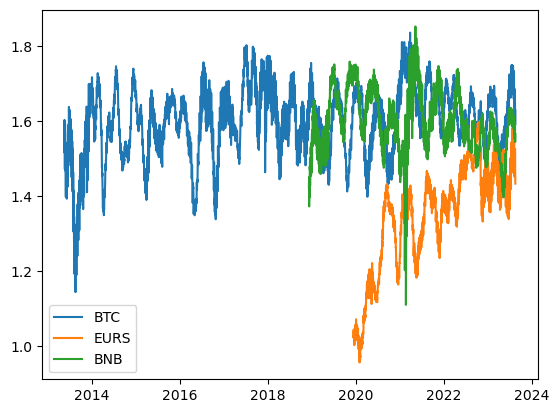

In [74]:
plt.plot(data['Date'], data['BTC_H'], label='BTC')
plt.plot(data['Date'], data['EURS_H'], label='EURS')
plt.plot(data['Date'], data['BNB_H'], label='BNB')
plt.legend()
plt.show()

# three diffrent time series

In [76]:
sample_size=500
scalar=100
m_ls=[4,8,16,32,64,128]
df = pd.DataFrame(data={"mean_rev": np.log(np.random.randn(sample_size) + scalar),
                        "gbm": np.log(np.cumsum(np.random.randn(sample_size)) + scalar),
                        "trending": np.log(np.cumsum(np.random.randn(sample_size) + 1) + scalar)})
for column in df.columns:
    lag, dfa=MFDFA(df[column].values, lag = np.array(m_ls), q = 2, order = 1)
    H_hat=np.polyfit(np.log(lag),np.log(dfa),1)[0]
    print('Estimated H = '+'{:.3f}'.format(H_hat[0]))


Estimated H = 0.536
Estimated H = 1.504
Estimated H = 1.965


In [9]:
for column in df.columns:
    print('Estimated H = '+'{:.3f}'.format(H_DFA(df[column].values,m_ls)))

Estimated H = 0.571
Estimated H = 1.607
Estimated H = 2.096


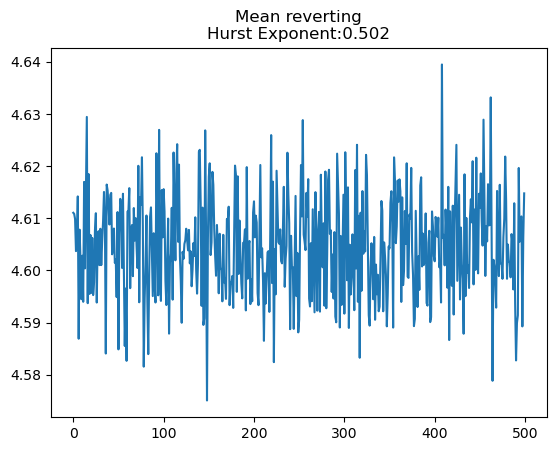

In [115]:
plt.plot(df['mean_rev'])
# plt.annotate(f'Mean reverting\nHurst Exponent:{H_DFA(df["mean_rev"].values,m_ls):.3f}', xy=(1, 20), xytext=(1, 4),
#              fontsize=12, color='black',
#              bbox=dict(boxstyle='square, pad=0.3', edgecolor='white', facecolor='white'))
plt.title(f'Mean reverting\nHurst Exponent:{H_DFA(df["mean_rev"].values,m_ls):.3f}')
# plt.text(0, 3, 'Random Walk', fontsize=12, color='red')
# plt.text(0, 2.5, f'Hurst Exponent:{H_DFA(samples,m_ls):.3f}', fontsize=12, color='red')
plt.show()

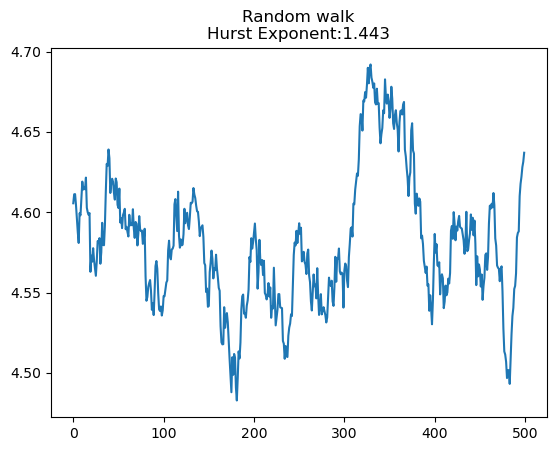

In [116]:
plt.plot(df['gbm'])
plt.title(f'Random walk\nHurst Exponent:{H_DFA(df["gbm"].values,m_ls):.3f}')
plt.show()

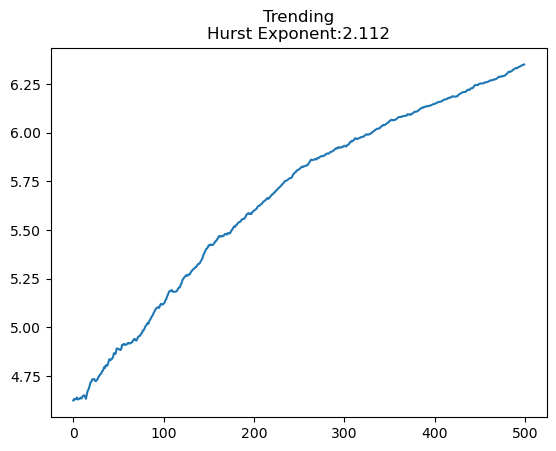

In [117]:
plt.plot(df['trending'])
plt.title(f'Trending\nHurst Exponent:{H_DFA(df["trending"].values,m_ls):.3f}')
plt.show()

# trial

In [56]:
y=data[:500]
y=y['Close']
mean_y=np.mean(y)

y-mean_y

4247   -17.904759
4246   -17.818999
4245   -18.138762
4244   -17.490571
4243   -16.365259
          ...    
3752    94.162788
3751    92.205787
3750    91.962791
3749    94.942795
3748    88.462791
Name: Close, Length: 500, dtype: float64

In [55]:
np.cumsum(y - mean_y)

4247   -1.790476e+01
4246   -3.572376e+01
4245   -5.386252e+01
4244   -7.135309e+01
4243   -8.771835e+01
            ...     
3752   -3.675742e+02
3751   -2.753684e+02
3750   -1.834056e+02
3749   -8.846279e+01
3748    4.661160e-12
Name: Close, Length: 500, dtype: float64

In [21]:
mean_y=np.mean(y)
x = np.cumsum(y - mean_y)
F_m=[]
M=len(y)

for m in m_ls:
    subsamples = np.array_split(x, M // m)

    xpol = []
    for i, subsample in enumerate(subsamples):
        x_values = np.arange(len(subsample))
        slope, intercept, r_value, p_value, std_err =  linregress(x_values,subsample)

        xpol.extend(slope*x_values+intercept)

    F_m.append(np.sqrt(sum((x-xpol)**2)/M))

ln_m = np.log(m_ls)
ln_F_m = np.log(F_m)

slope, intercept, r_value, p_value, std_err = linregress(ln_m,ln_F_m)
hurst_exponent=slope
hurst_exponent

1.5722497615023256

In [7]:
def H_DFA(y,m_ls):
    
    mean_y=np.mean(y)
    x = np.cumsum(y - mean_y)
    F_m=[]
    M=len(y)
    
    for m in m_ls:
        subsamples = np.array_split(x, M // m)
        
        xpol = []
        for i, subsample in enumerate(subsamples):
            x_values = np.arange(len(subsample))
            slope, intercept, r_value, p_value, std_err =  linregress(x_values,subsample)

            xpol.extend(slope*x_values+intercept)
            
        F_m.append(np.sqrt(sum((x-xpol)**2)/M))
    
    ln_m = np.log(m_ls)
    ln_F_m = np.log(F_m)
    
    slope, intercept, r_value, p_value, std_err = linregress(ln_m,ln_F_m)
    hurst_exponent=slope
    
    return hurst_exponent

# gennerate 3 class time series

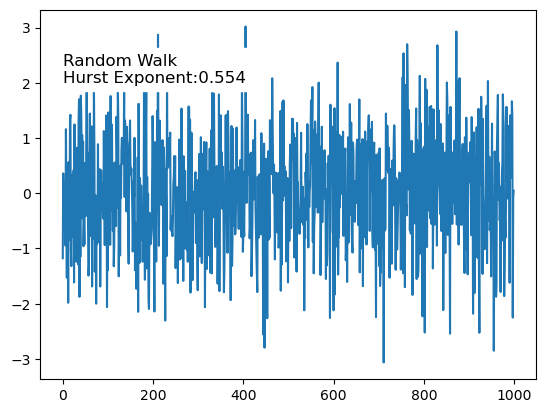

In [59]:
import numpy
import matplotlib.pyplot as plt

# random walk
mean = 0
std = 1 
num_samples = 1000
samples = numpy.random.normal(mean, std, size=num_samples)

plt.plot(samples)
plt.annotate(f'Random Walk\nHurst Exponent:{H_DFA(samples,m_ls):.3f}', xy=(0, 2), xytext=(1.2, 2),
             fontsize=12, color='black',
             bbox=dict(boxstyle='square, pad=0.3', edgecolor='white', facecolor='white'))

# plt.text(0, 3, 'Random Walk', fontsize=12, color='red')
# plt.text(0, 2.5, f'Hurst Exponent:{H_DFA(samples,m_ls):.3f}', fontsize=12, color='red')
plt.show()

# plt.annotate('Point 1', xy=(1, 2), xytext=(1.5, 3),
#              arrowprops=dict(arrowstyle='->', color='red'))
# y=data['Close']
# w=500
# m_ls=[4,8,16,32,64,128]
# H_dfa=[]
# H_DFA(y[:500],m_ls)

In [81]:
sample_size=500
scalar=100
df = pd.DataFrame(data={"mean_rev": np.log(np.random.randn(sample_size) + scalar),
                        "gbm": np.log(np.cumsum(np.random.randn(sample_size)) + scalar),
                        "trending": np.log(np.cumsum(np.random.randn(sample_size) + 1) + scalar)})
for column in df.columns:
    print(f"{column}: {H_DFA(df[column].values, m_ls):.4f}")

mean_rev: 0.6473
gbm: 1.6061
trending: 2.0661


Hurst Exponent:2.012


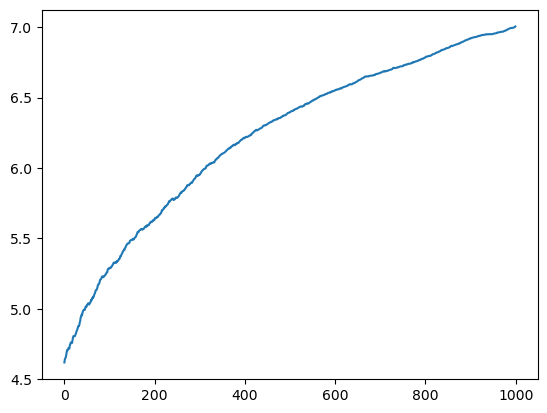

In [80]:
# mean reverting
mean = 0.0  
theta = 0.1  
sigma = 0.2  
dt = 0.01  
T = 10.0  
num_steps = int(T / dt)  
t = np.linspace(0.0, T, num_steps)  


x = np.zeros(num_steps)
x[0] = 0.0

for i in range(1, num_steps):
    x[i] = x[i - 1] + theta * (mean - x[i - 1]) * dt + sigma * np.sqrt(dt) * np.random.normal()

sample_size=1000
scalar=100
x=np.log(np.cumsum(np.random.randn(sample_size) + 1) + scalar)

print(f'Hurst Exponent:{H_DFA(x,m_ls):.3f}')
plt.plot(x)
plt.annotate(f'Random Walk\nHurst Exponent:{H_DFA(x,m_ls):.3f}', xy=(1, 3), xytext=(1.2, 2),
             fontsize=12, color='black',
             bbox=dict(boxstyle='square, pad=0.3', edgecolor='white', facecolor='white'))

plt.show()

In [49]:
y=data['Close']
w=500
m_ls=[4,8,16,32,64,128]
H_dfa=[]

for start in range(w, len(y)):
    slopes, smooth, cu, cd = hurst_exponent(close, barsize, slen, Min, Max)
    H_dfa.append(slopes[-1])
#     H_dfa.append(H_DFA(y[start-w:start],m_ls))

NameError: name 'close' is not defined

In [ ]:
BTC=H_dfa

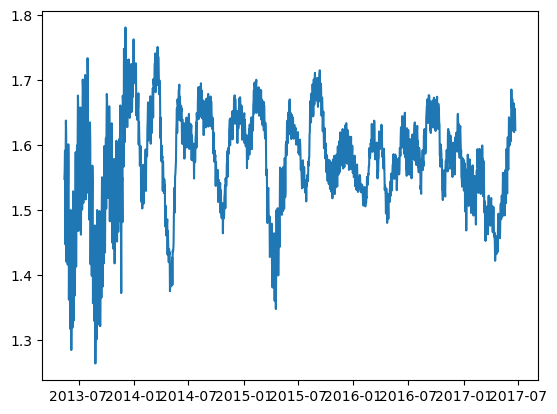

In [35]:
plt.plot(data['Date'][500:2000], H_dfa[:1500])
# plt.plot(ln_m, slope * ln_m + intercept, color='red', label='Regression Line')
# plt.xlabel('ln(m)')
# plt.ylabel('ln(F(m))')
# plt.legend()
plt.show()


In [4]:
data

,Date,Open,High,Low,Close,Volume,Market Cap
4247,2012-01-01,4.612118,6.159421,4.612118,5.132450,108873.83,41104894.20
4246,2012-01-02,5.132012,5.752127,4.557404,5.218210,69453.09,41831181.11
4245,2012-01-03,5.217731,5.578825,4.747638,4.898447,125476.58,39306976.37
4244,2012-01-04,4.913304,6.723132,4.857608,5.546638,131362.55,44549391.44
4243,2012-01-05,5.561160,7.390918,5.561160,6.671950,182401.27,53636891.29


In [9]:
lag=np.array(lag)
lag[lag>1]

array([  4,   8,  16,  32,  64, 128])

In [11]:
from MFDFA import MFDFA

y=data['Close']
y=y[:500]
# Select a band of lags, which usually ranges from
# very small segments of data, to very long ones, as
lag = np.array([4,8,16,32,64,128])
# Notice these must be ints, since these will segment
# the data into chucks of lag size

# Select the power q
q = 2

# The order of the polynomial fitting
order = 1

# Obtain the (MF)DFA as
lag, dfa = MFDFA(np.array(y), lag =lag , q = q, order = order)

In [12]:
dfa

array([[  3.04479793],
       [  6.31197772],
       [ 17.49229919],
       [ 42.43825108],
       [ 64.01543016],
       [354.79414809]])

# Other methods

Hurst Exponent: 0.602
Smoothed Hurst Exponent: 0.602


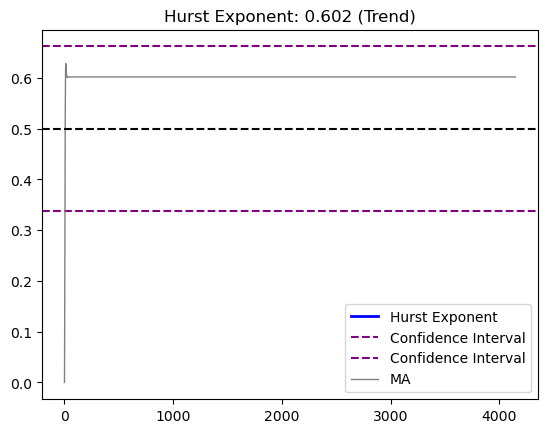

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import yfinance as yf
from scipy.stats import linregress

# (a) - inputs
def inputs(barsize=100, slen=18, Min=8, Max=2):
    return barsize, slen, Min, Max

# (b) - Declaration
Min = 8
Max = 2
fluc = np.full(10, np.nan)
scale = np.full(10, np.nan)
slope = np.nan

# (c) - SS function
def ss(series, period):
    PI = 2.0 * np.arcsin(1.0)
    SQRT2 = np.sqrt(2.0)
    _lambda = PI * SQRT2 / period
    a1 = np.exp(-_lambda)
    coeff2 = 2.0 * a1 * np.cos(_lambda)
    coeff3 = - np.power(a1, 2.0)
    coeff1 = 1.0 - coeff2 - coeff3
    filt1 = np.zeros_like(series)
    
    for i in range(2, len(series)):
        filt1[i] = coeff1 * (series[i] + (series[i - 1] if i - 1 >= 0 else 0)) * 0.5 + coeff2 * filt1[i - 1] + coeff3 * filt1[i - 2]

    return filt1

# (d) - Calculations
def RMS(N1, N, csum):
    seq = np.arange(1, N + 1)
    y = csum[N1 : N1 + N]
    sdx = np.std(seq) * np.sqrt(N / (N - 1))
    sdy = np.std(y) * np.sqrt(N / (N - 1))
    cov = np.cov(seq, y, bias=True)[0, 1] * (N / (N - 1))
    r2 = np.power(cov / (sdx * sdy), 2)
    rms = np.sqrt(1 - r2) * sdy
    return rms

def Arms(bar, csum, barsize):
    num = np.floor(barsize / bar).astype(int)
    sumr = sum(RMS(i * bar, bar, csum) for i in range(num))
    avg = np.log10(sumr / num)
    return avg

def fs(x, barsize, Min, Max):
    return np.round(Min * np.power(np.power(barsize / (Max * Min), 0.1111111111), x)).astype(int)

def hurst_exponent(close, barsize=100, slen=18, Min=8, Max=2):
    # Calculate Log Return
    r = np.log(close / np.roll(close, 1))
    # Mean of Log Return
    mean = np.convolve(r, np.ones(barsize) / barsize, mode="valid")
    mean = np.pad(mean, (barsize - 1, 0), 'constant', constant_values=0)

    # Calculate Cumulative Sum
    csum = np.cumsum(r - mean)

    # Set Ten Points of Root Mean Square Average along the Y log axis
    fluc = np.array([Arms(fs(i, barsize, Min, Max), csum, barsize) for i in range(10)])

    # Set Ten Points of data scale along the X log axis
    scale = np.array([np.log10(fs(i, barsize, Min, Max)) for i in range(10)])

        # Calculate Slope Measured From RMS and Scale on Log log plot using linear regression
    slopes = np.array([np.cov(scale, fluc, bias=True)[0, 1] / np.var(scale, ddof=0) for i in range(len(close) - barsize + 1)])

    # Calculate Moving Average Smoothed Hurst Exponent
    smooth = ss(slopes, slen)

    # Calculate Critical Value based on Confidence Interval (95% Confidence)
    ci = 1.645 * (0.3912 / np.power(barsize, 0.3))
    # Calculate Expected Value plus Critical Value
    cu = 0.5 + ci
    cd = 0.5 - ci

    return slopes, smooth, cu, cd

# (e) - Plots
def plot_hurst_exponent(close, barsize=100, slen=18, Min=8, Max=2):
    slopes, smooth, cu, cd = hurst_exponent(close, barsize, slen, Min, Max)

    # Color of HE
    c = "green" if slopes[-1] > cu else "blue" if slopes[-1] >= 0.5 else "red" if slopes[-1] < cd else "orange" if slopes[-1] < 0.5 else "black"

    # Text of Table
    text = "Significant Trend" if slopes[-1] > cu else "Trend" if slopes[-1] >= 0.5 else "Significant Mean Reversion" if slopes[-1] < cd else "Mean Reversion" if slopes[-1] < 0.5 else "N/A"

    # Plotting
    fig, ax = plt.subplots()

    # Hurst Exponent
    ax.plot(slope, label="Hurst Exponent", color=c, linewidth=2)

    # Confidence Interval
    ax.axhline(cu, label="Confidence Interval", color="purple", linestyle="--")
    ax.axhline(cd, label="Confidence Interval", color="purple", linestyle="--")

    # Moving Average
    ax.plot(smooth, label="MA", color="gray", linewidth=1)

    # 0.5 Mid Level
    ax.axhline(0.5, color="black", linestyle="dashed")

    # Display legend and text
    ax.legend()
    plt.title(f"Hurst Exponent: {slopes[-1]:.3f} ({text})") 
    
    print(f"Hurst Exponent: {slopes[-1]:.3f}")
    print(f"Smoothed Hurst Exponent: {smooth[-1]:.3f}")
    
    plt.show()

# Example usage
# import yfinance as yf

# Fetch historical stock data for Apple Inc. (AAPL)
# ticker = "AAPL"
# data = yf.download(ticker, start="2020-01-01", end="2021-01-01")

# Use the 'Close' column for Hurst Exponent calculation
close_prices = y.values

plot_hurst_exponent(close_prices)

In [5]:
import sys
import math
import warnings
import numpy as np
import pandas as pd

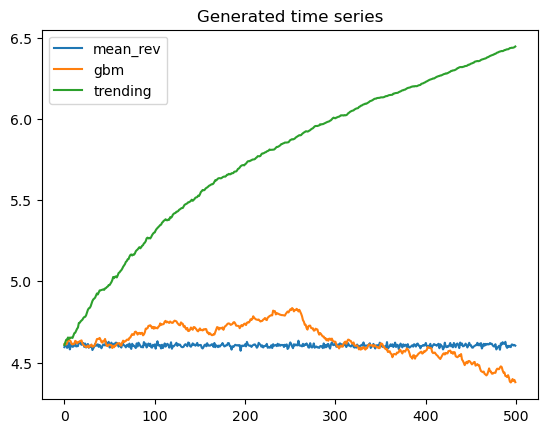

In [46]:
sample_size = 500
scalar = 100

np.random.seed(123)
df = pd.DataFrame(data={"mean_rev": np.log(np.random.randn(sample_size) + scalar),
                        "gbm": np.log(np.cumsum(np.random.randn(sample_size)) + scalar),
                        "trending": np.log(np.cumsum(np.random.randn(sample_size) + 1) + scalar)})

df.plot(title="Generated time series");

In [47]:
for column in df.columns:
        print(f"{column}: {H_DFA(df[column].values, m_ls):.4f}")

mean_rev: 0.5331
gbm: 1.6295
trending: 2.1135


In [3]:
def get_hurst_exponent(time_series, max_lag=20):
    """Returns the Hurst Exponent of the time series"""
    
    lags = range(2, max_lag)

    # variances of the lagged differences
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]

    # calculate the slope of the log plot -> the Hurst Exponent
    reg = np.polyfit(np.log(lags), np.log(tau), 1)

    return reg[0]

In [4]:
for lag in [20, 100, 300, 500]:
    print(f"Hurst exponents with {lag} lags ----")
    for column in df.columns:
        print(f"{column}: {get_hurst_exponent(df[column].values, lag):.4f}")

Hurst exponents with 20 lags ----
mean_rev: 0.0064
gbm: 0.4539
trending: 0.8715
Hurst exponents with 100 lags ----
mean_rev: -0.0021
gbm: 0.5401
trending: 0.8442
Hurst exponents with 300 lags ----
mean_rev: 0.0002
gbm: 0.5691
trending: 0.7463
Hurst exponents with 500 lags ----
mean_rev: 0.0015
gbm: 0.4854
trending: 0.6662


# R/S analysis

In [ ]:
def simplified_RS(series,window_sizes):
    for w in window_sizes:
        rs = []
        for start in range(0, len(series), w):
            if (start+w)>len(series):
                break
            _ = RS_func(series[start:start+w], kind)
            if _ != 0:
                rs.append(_)
            RS.append(np.mean(rs))
            
    

In [ ]:
def Anis_Lloyd_RS:
    

In [11]:
def __to_inc(x):
    incs = x[1:] - x[:-1]
    return incs

def __to_pct(x):
    pcts = x[1:] / x[:-1] - 1.
    return pcts

def __get_simplified_RS(series, kind):
    """
    Simplified version of rescaled range

    Parameters
    ----------

    series : array-like
        (Time-)series
    kind : str
        The kind of series (refer to compute_Hc docstring)
    """

    if kind == 'random_walk':
        incs = __to_inc(series)
        R = max(series) - min(series)  # range in absolute values
        S = np.std(incs, ddof=1)
    elif kind == 'price':
        pcts = __to_pct(series)
        R = max(series) / min(series) - 1. # range in percent
        S = np.std(pcts, ddof=1)
    elif kind == 'change':
        incs = series
        _series = np.hstack([[0.],np.cumsum(incs)])
        R = max(_series) - min(_series)  # range in absolute values
        S = np.std(incs, ddof=1)

    if R == 0 or S == 0:
        return 0  # return 0 to skip this interval due the undefined R/S ratio

    return R / S

def __get_RS(series, kind):
    """
    Get rescaled range (using the range of cumulative sum
    of deviations instead of the range of a series as in the simplified version
    of R/S) from a time-series of values.

    Parameters
    ----------

    series : array-like
        (Time-)series
    kind : str
        The kind of series (refer to compute_Hc docstring)
    """

    if kind == 'random_walk':
        incs = __to_inc(series)
        mean_inc = (series[-1] - series[0]) / len(incs)
        deviations = incs - mean_inc
        Z = np.cumsum(deviations)
        R = max(Z) - min(Z)
        S = np.std(incs, ddof=1)

    elif kind == 'price':
        incs = __to_pct(series)
        mean_inc = np.sum(incs) / len(incs)
        deviations = incs - mean_inc
        Z = np.cumsum(deviations)
        R = max(Z) - min(Z)
        S = np.std(incs, ddof=1)

    elif kind == 'change':
        incs = series
        mean_inc = np.sum(incs) / len(incs)
        deviations = incs - mean_inc
        Z = np.cumsum(deviations)
        R = max(Z) - min(Z)
        S = np.std(incs, ddof=1)

    if R == 0 or S == 0:
        return 0  # return 0 to skip this interval due undefined R/S

    return R / S

def compute_Hc(series, kind="random_walk", min_window=10, max_window=None, simplified=True):
    """
    Compute H (Hurst exponent) and C according to Hurst equation:
    E(R/S) = c * T^H

    Refer to:
    https://en.wikipedia.org/wiki/Hurst_exponent
    https://en.wikipedia.org/wiki/Rescaled_range
    https://en.wikipedia.org/wiki/Random_walk

    Parameters
    ----------

    series : array-like
        (Time-)series

    kind : str
        Kind of series
        possible values are 'random_walk', 'change' and 'price':
        - 'random_walk' means that a series is a random walk with random increments;
        - 'price' means that a series is a random walk with random multipliers;
        - 'change' means that a series consists of random increments
            (thus produced random walk is a cumulative sum of increments);

    min_window : int, default 10
        the minimal window size for R/S calculation

    max_window : int, default is the length of series minus 1
        the maximal window size for R/S calculation

    simplified : bool, default True
        whether to use the simplified or the original version of R/S calculation

    Returns tuple of
        H, c and data
        where H and c — parameters or Hurst equation
        and data is a list of 2 lists: time intervals and R/S-values for correspoding time interval
        for further plotting log(data[0]) on X and log(data[1]) on Y
    """

    if len(series)<100:
        raise ValueError("Series length must be greater or equal to 100")

    ndarray_likes = [np.ndarray]
    if "pandas.core.series" in sys.modules.keys():
        ndarray_likes.append(pd.core.series.Series)

    # convert series to numpy array if series is not numpy array or pandas Series
    if type(series) not in ndarray_likes:
        series = np.array(series)

    if "pandas.core.series" in sys.modules.keys() and type(series) == pd.core.series.Series:
        if series.isnull().values.any():
            raise ValueError("Series contains NaNs")
        series = series.values  # convert pandas Series to numpy array
    elif np.isnan(np.min(series)):
        raise ValueError("Series contains NaNs")

    if simplified:
        RS_func = __get_simplified_RS
    else:
        RS_func = __get_RS


    err = np.geterr()
    np.seterr(all='raise')

    max_window = max_window or len(series)-1
    window_sizes = list(map(
        lambda x: int(10**x),
        np.arange(math.log10(min_window), math.log10(max_window), 0.25)))
    window_sizes.append(len(series))

    RS = []
    for w in window_sizes:
        rs = []
        for start in range(0, len(series), w):
            if (start+w)>len(series):
                break
            _ = RS_func(series[start:start+w], kind)
            if _ != 0:
                rs.append(_)
        RS.append(np.mean(rs))

    A = np.vstack([np.log10(window_sizes), np.ones(len(RS))]).T
    H, c = np.linalg.lstsq(A, np.log10(RS), rcond=-1)[0]
    np.seterr(**err)

    c = 10**c
    return H, c, [window_sizes, RS]


In [12]:
df

,mean_rev,gbm,trending
0,4.594255,4.597654,4.597398
1,4.615094,4.603356,4.595366
2,4.607996,4.610525,4.616314
3,4.589993,4.600535,4.634551
4,4.599367,4.605295,4.629485
...,...,...,...
995,4.611498,4.713706,7.008394
996,4.615813,4.703608,7.008442
997,4.596035,4.700347,7.011188
998,4.609862,4.685603,7.013004


In [13]:

# Evaluate Hurst equation
H, c, data = compute_Hc(df['mean_rev'].values, kind='price', simplified=True)

# Plot
# uncomment the following to make a plot using Matplotlib:
"""
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()
"""

print("H={:.4f}".format(H))

H=0.1630, c=1.6625


In [14]:
data

[[10, 17, 31, 56, 100, 177, 316, 562, 1000],
 [2.24109315848898,
  2.635222006008945,
  3.003497443095438,
  3.2954212114069996,
  3.6567776647539447,
  4.035197812311179,
  4.346645340888816,
  4.485435810979689,
  4.889799928880843]]